rozdelenie psov na tie, ktore maju podla svojich majitelov separation anxiety a tych co ju nemaju

Text(0, 0.5, 'Count')

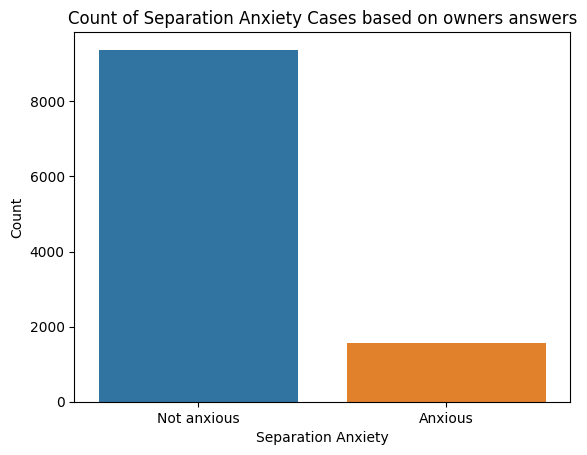

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown


dogs = pd.read_csv("psy_data.csv", header=0).set_index("dog.id")



subset = dogs.loc[:, ['Separation_age', 'Leaving_pant', 'Leaving_vocalization', "Leaving_salivate", "Leaving_restless", "Alone_destroy", "Alone_urinate", "Alone_vocalize", "Alone_pant", "separation_anxiety", "separation_behavior_score","breed_group"]]
sns.countplot(data=subset, x="separation_anxiety", hue="separation_anxiety", legend = False)
plt.title("Count of Separation Anxiety Cases based on owners answers")
plt.xlabel("Separation Anxiety")
plt.xticks([0.0, 1.0], ["Not anxious", "Anxious"])
plt.ylabel("Count")


rozdelenie psov na tie, ktore maju podla snadpriemernu nameranu separation anxiety a tych co ju maju podpriemernu

-6.76596641532258e-09


Text(0, 0.5, 'Count')

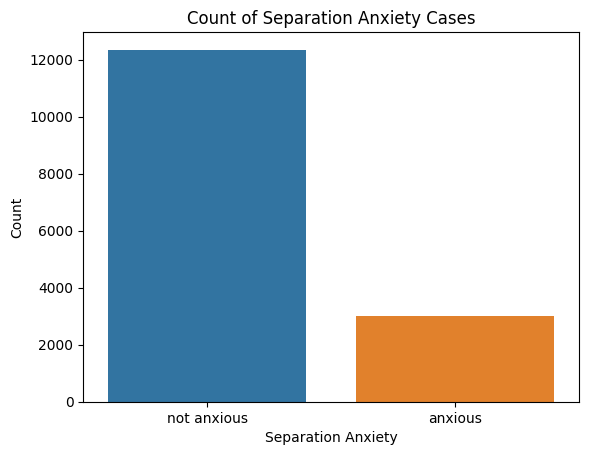

In [ ]:
mean = subset["separation_behavior_score"].mean()
print(mean)
subset["anxious"] = ["anxious" if i>mean else "not anxious" for i in subset["separation_behavior_score"]]
sns.countplot(data=subset ,x="anxious",hue = "anxious")
plt.title("Count of Separation Anxiety Cases based on mean of measured value")
plt.xlabel("Separation Anxiety")
plt.ylabel("Count")

rozdelenie na psov co podla svojich majitelov nemaju spearation anxiety, ale podla nameranych hodnot ju maju nadpriemernu a tych co podla svojich majitelov maju sep anx, ale podla nameranych hodnot ju maju podpriemernu

1879
10927


Text(0, 0.5, 'Count')

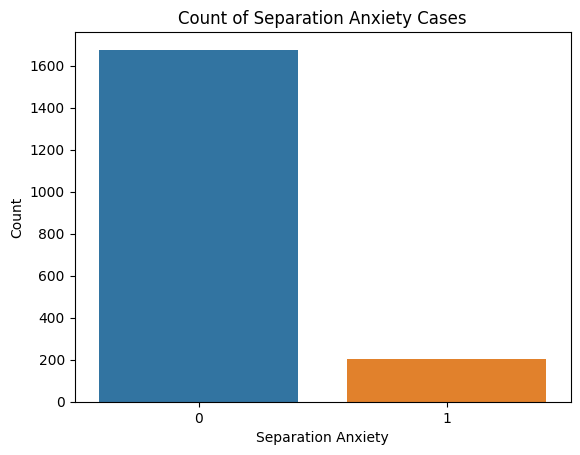

In [108]:
print(sum([len(subset.query("separation_anxiety == 0 and separation_behavior_score>=@mean")) + len(subset.query("separation_anxiety == 1 and separation_behavior_score<=@mean"))]))
print(len(subset.query("separation_anxiety == 0 or separation_anxiety == 1")))
sns.countplot(data=subset.query("separation_anxiety == 0 and separation_behavior_score>=@mean"), x="separation_anxiety")
sns.countplot(data=subset.query("separation_anxiety == 1 and separation_behavior_score<=@mean"), x="separation_anxiety")

plt.title("Count of Separation Anxiety Cases")
plt.xlabel("Separation Anxiety")
plt.xticks([0.0, 1.0], [0, 1])
plt.ylabel("Count")


Pocet hodnot priznakov sep. anx.

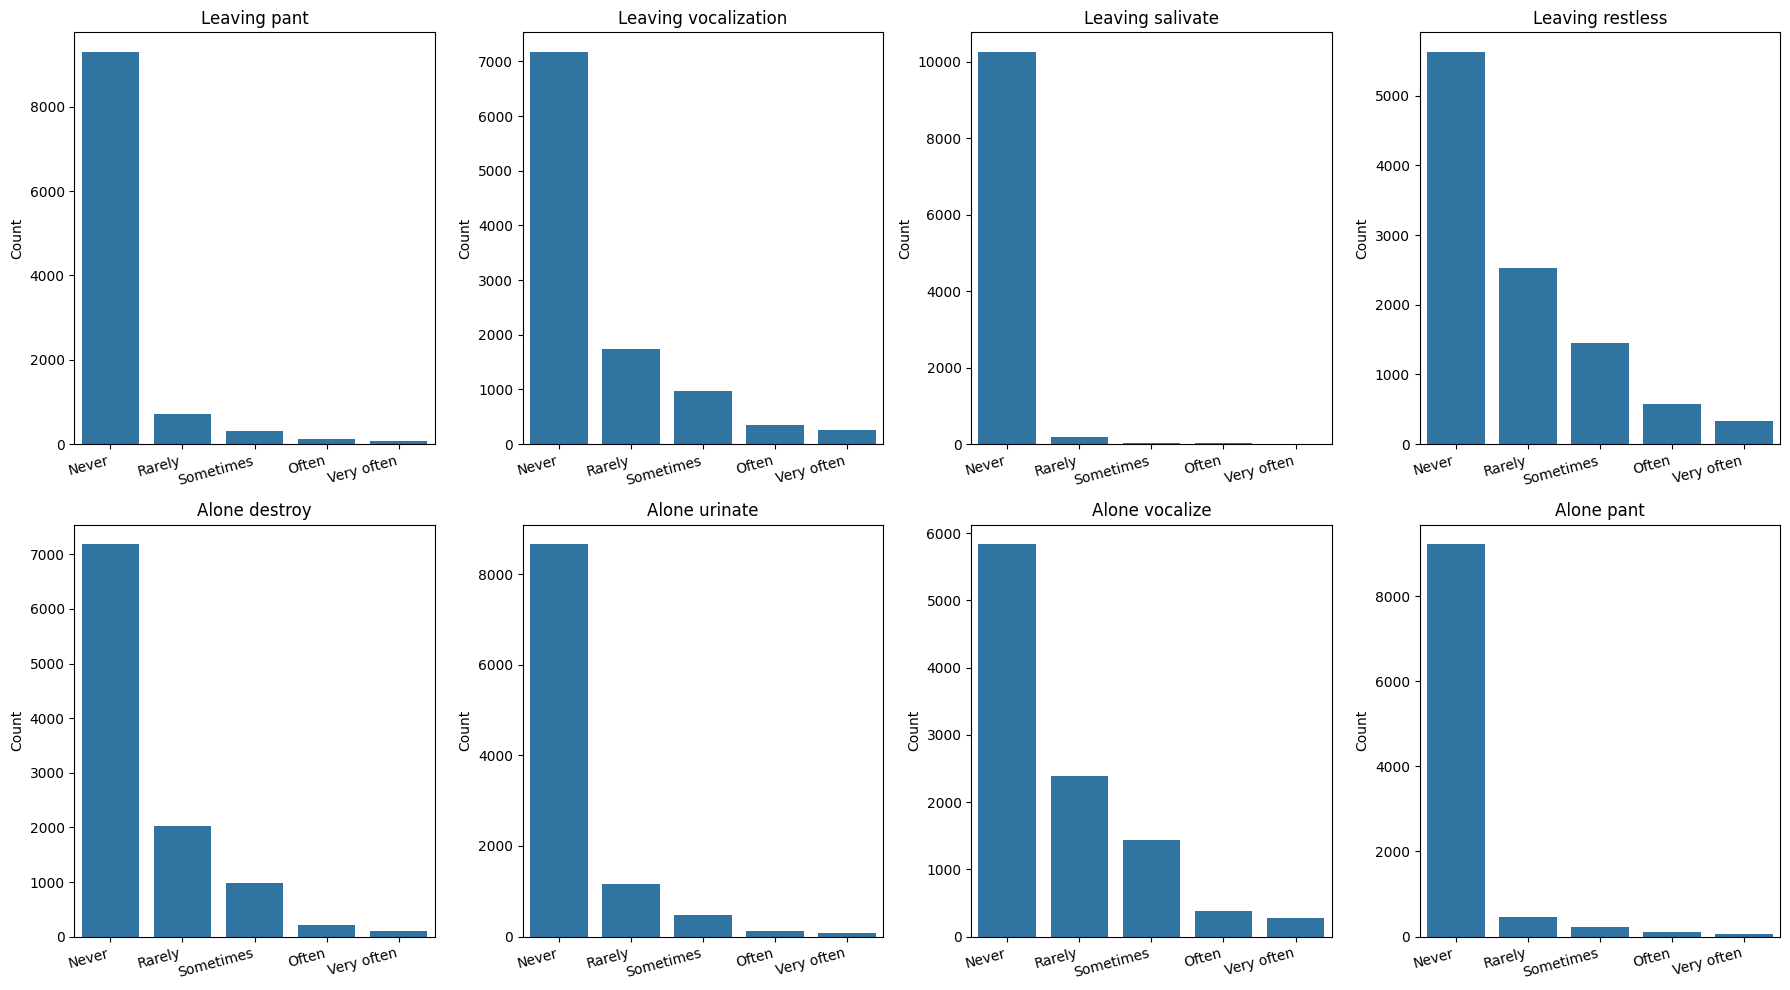

In [106]:
columns = ['Leaving_pant', 'Leaving_vocalization', 'Leaving_salivate', 'Leaving_restless',
           'Alone_destroy', 'Alone_urinate', 'Alone_vocalize', 'Alone_pant']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=subset, ax=axes[i])
    axes[i].set_title(col.replace("_", " "))
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

    tick_labels = {0.0: "Never", 1.0: "Rarely", 2.0: "Sometimes", 3.0: "Often", 4.0: "Very often"}
    axes[i].set_xticks(list(tick_labels.keys()))
    axes[i].set_xticklabels(list(tick_labels.values()), rotation=15, ha='right')

plt.tight_layout()
plt.show()



priemery priznakv sep anx, je viditelne ze najcastejsie priznamky su Leaving_restless a alone_vocalize rovnako ako vo vrchnom grafe

Text(0.5, 1.0, 'Means of symptoms of separation anxiety')

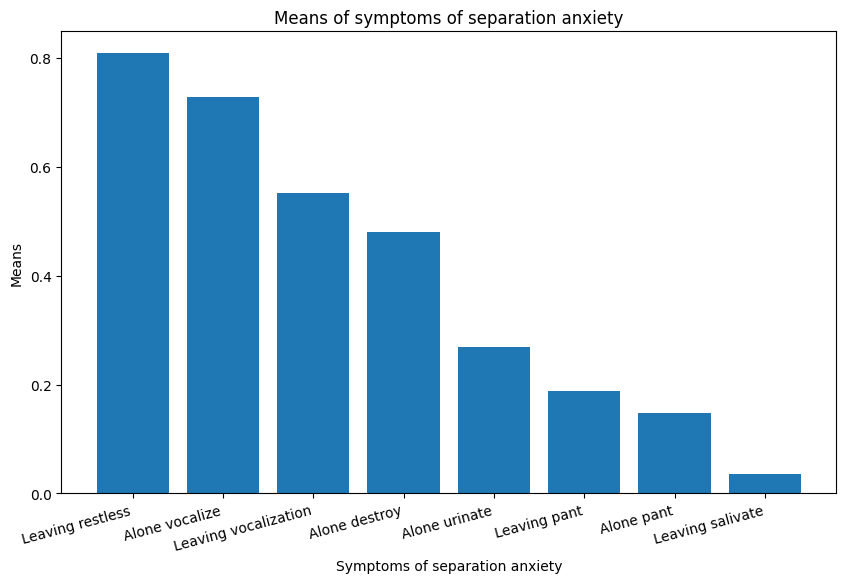

In [97]:
mean_values, symptoms = zip(*sorted([(subset[i].mean(),i.replace("_", " ")) for i in columns], key=lambda x: x[0])[::-1])
plt.figure(figsize=(10, 6))
plt.bar(symptoms, mean_values)

plt.xticks(rotation=15, ha='right')
plt.xlabel('Symptoms of separation anxiety')

ticks = plt.yticks()[0]   
plt.yticks(ticks[::2])  
plt.ylabel('Means')

plt.title('Means of symptoms of separation anxiety')

In [98]:
fig = px.scatter(
    subset,
    x="Separation_age",
    y="separation_behavior_score",
    color="breed_group",
    hover_data=["breed_group"],
    title="Separation Age vs Behavior Score by Breed Group"
)

fig.update_layout(
    xaxis_title="Separation Age",
    yaxis_title="Separation Behavior Score",
    legend_title="Breed Group"
)



Zistujeme najuskostlivejsie plemeno psa


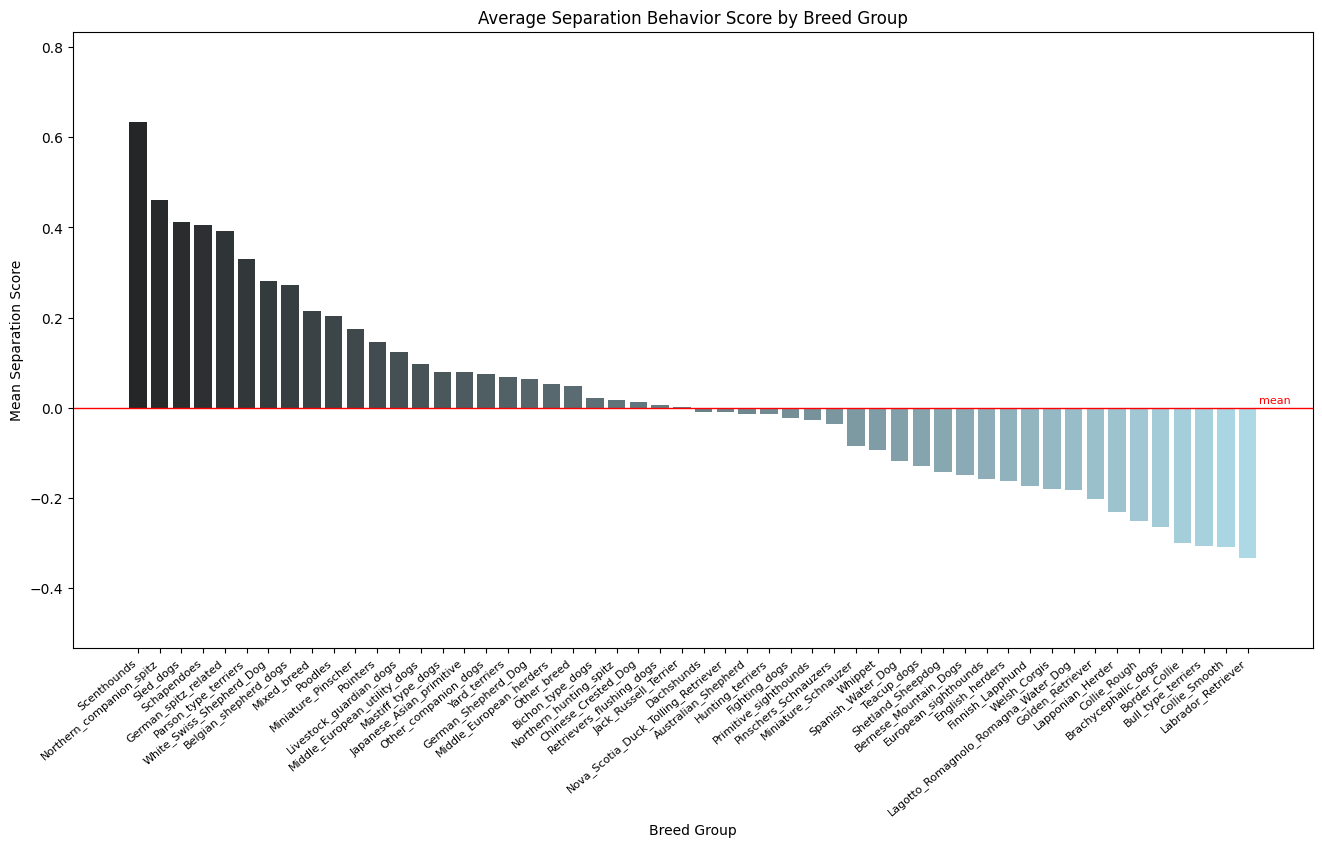

In [99]:
a = subset.groupby("breed_group")["separation_behavior_score"].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))

palette = sns.dark_palette("lightblue", n_colors=len(a))
bars = plt.bar(a.index, a.values, color = palette)

plt.axhline(y=mean, color='red', linestyle='-', linewidth=1)
plt.text(len(a) - 0.5, mean + 0.01, 'mean', color='red', fontsize=8)
plt.ylim(a.min()-0.2, a.max()+0.2)
plt.xticks(rotation=40, ha='right',fontsize = 8)
plt.title('Average Separation Behavior Score by Breed Group')
plt.ylabel('Mean Separation Score')
plt.xlabel('Breed Group')

plt.show()

